In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra


import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_21.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_12.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_25.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_37.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_35.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_14.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_8.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_16.jpg
/kaggle/input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/50/50_val_0.jpg
/kaggle/inpu

In [2]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
# from keras.utils import load_img, img_to_array

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=30,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    "../input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/training/",
    target_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "../input/indian-currency-note-images-dataset-2020/Indian currency dataset v1/validation/",
    target_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

Found 3566 images belonging to 8 classes.
Found 345 images belonging to 8 classes.


In [4]:
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(64,64,3))

output = resnet.layers[-45].output
output = keras.layers.Flatten()(output)

resnet = Model(resnet.input, output)

# for layer in resnet.layers:
#     layer.trainable = False


resnet.summary()
    
model = Sequential([
      resnet,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(8, activation='softmax')
])
    
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

2023-02-06 10:50:27.188417: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


94781440/94765736 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1_conv[0][0]                 
_____________________________

In [5]:
epochs = 5

history = model.fit(x = train_generator,validation_data=test_generator ,batch_size=32,verbose=1, epochs=epochs)

2023-02-06 10:50:36.191667: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
112/112 [==============================] - 398s 3s/step - loss: 2.2692 - accuracy: 0.1408 - val_loss: 2.0785 - val_accuracy: 0.1304
Epoch 2/5
112/112 [==============================] - 340s 3s/step - loss: 2.0792 - accuracy: 0.1405 - val_loss: 2.0778 - val_accuracy: 0.1304
Epoch 3/5
112/112 [==============================] - 337s 3s/step - loss: 2.0782 - accuracy: 0.1402 - val_loss: 2.0771 - val_accuracy: 0.1304
Epoch 4/5
112/112 [==============================] - 338s 3s/step - loss: 2.0782 - accuracy: 0.1402 - val_loss: 2.0768 - val_accuracy: 0.1304
Epoch 5/5
112/112 [==============================] - 335s 3s/step - loss: 2.0782 - accuracy: 0.1402 - val_loss: 2.0765 - val_accuracy: 0.1304


In [6]:
model.evaluate(test_generator)

11/11 [==============================] - 26s 2s/step - loss: 2.0765 - accuracy: 0.1304


[2.076498031616211, 0.1304347813129425]

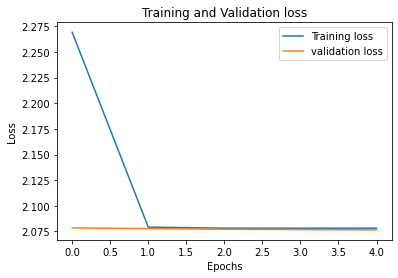

In [7]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
ep = range(epochs)
plt.plot(ep, loss_train, label='Training loss')
plt.plot(ep, loss_val, label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

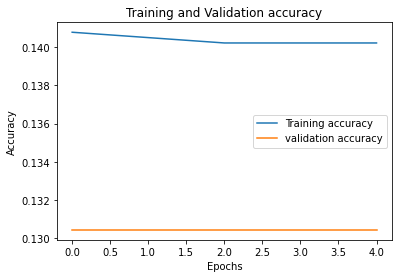

In [8]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
ep = range(epochs)
plt.plot(ep, loss_train,label='Training accuracy')
plt.plot(ep, loss_val, label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()